# Week 8 : Assignment Imputaion

##### Assignment Content :

Each XLS or XLSX file contains a dataframe. <br>
Load each XLS or XLSX file in your Jupyter notebook. <br>
For each dataframe, [address missing values ](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html)by taking the following steps:<br>
<ol>
    <li>Count the number of missing values in the dataframe; count the number of missing values per column</li>
    <li>Plot the distribution of data points using a <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html">histogram</a></li>
    <li>Create a <a heref="https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization-lag">lag plot</a> (a lag plot shows t versus t+1)</li>
    <li>Based on the lag plot, state in a <a href="https://www.ibm.com/docs/en/db2-event-store/1.1.3">markdown</a> cell whether the order of this data matters. </li>
    <li>Do one of the following (not both):<br>
<ul><li>If the order of the data matters, the <a href = "https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.interpolate.html">interpolate</a> the missing values</li>
<li>If the order of the data does not matter, fill in the missing data by sampling from the distribution</li></ul></li>
    <li>Create a scatter plot using the columns in dataframe; no Nan entries should be present</li></ol>
Submit a single Jupyter notebook with your analysis of the XLSX and XLS files.<br>
Perform interpolation or sampling programmatically using Python (not manually)<br><br>

##### Description :

The time series visualization assignment involves dowloading the multiple records for every 2 days and merge them into common dataframe to visualize the power consumption. 

##### Algorithm : 

> - Step 0: Import all libraries required.
> - Step 1: Dataset -1
>> - Step 1a: Load dataset into dataframe.
>> - Step 1b: Count missing values in each column.
>> - Step 1c: Plot Histogram
>> - Step 1d: Create a Log plot
>> - Step 1e: Interpolate/ Sampling
>> - Step 1f: Create a Scatter plot
> - Step 2: Dataset -2
>> - Step 2a: Load dataset into dataframe.
>> - Step 2b: Count missing values in each column.
>> - Step 2c: Plot Histogram
>> - Step 2d: Create a Log plot
>> - Step 2e: Interpolate/ Sampling
>> - Step 3f: Create a Scatter plot
> - Step 3: Dataset -3
>> - Step 3a: Load dataset into dataframe.
>> - Step 3b: Count missing values in each column.
>> - Step 3c: Plot Histogram
>> - Step 3d: Create a Log plot
>> - Step 3e: Interpolate/ Sampling
>> - Step 3f: Create a Scatter plot

### Step 0: Import all libraries required

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Step 1 : Dataset -1 

### Step 1a : Load dataset into dataframe

In [2]:
df_1 = pd.read_excel("imputation_homework_04.xls", index_col=0) # Read data by selecting index as column-0(1st column)
 # mark all the missing content rows as impuded values as we are gonna impude
#df_1["isImpuded"]=df_1.isnull().sum(axis = 1).replace({0: "given value", 1: "impuded value"})
df_1

,time,value,isImpuded
0,0.00,0.000000,given value
1,0.02,2.528779,given value
2,0.04,2.419020,given value
3,0.06,0.665052,given value
4,0.08,0.506655,given value
...,...,...,...
495,9.90,-2.938926,given value
496,9.92,-0.506655,given value
497,9.94,-0.665052,given value
498,9.96,-2.419020,given value


### Step 1b: Count missing values in each column.

In [3]:
count_df_1 = df_1.isna().sum().to_frame('count') # Count the number of missing records in each colum
count_df_1.loc["Total missing values in df - 1"]=[count_df_1.sum()[0]] # Sum up the values and add as a new line
count_df_1

,count
time,0
value,50
isImpuded,0
Total missing values in df - 1,50


### Step 1c: Plot Histogram

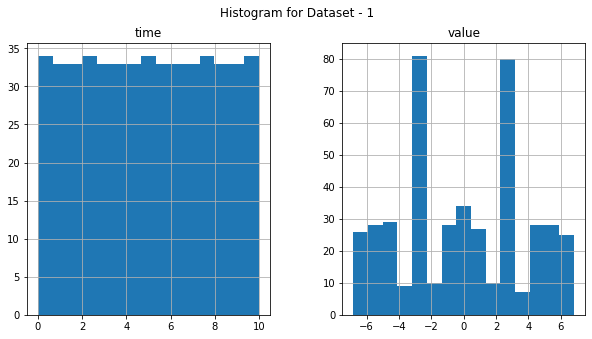

In [4]:
_ = df_1.hist(bins = 15,figsize=(10, 5)) # plot histogram
_ = plt.suptitle("Histogram for Dataset - 1") # Add title

### Step 1d: Create a Log plot

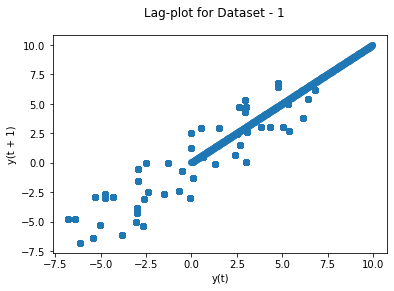

In [5]:
pd.plotting.lag_plot(df_1[["time","value"]], lag=1) # create a t & t+1 lag plot
_ = plt.suptitle("Lag-plot for Dataset - 1") # add title

#### Observation : 

The data is moderately correlated. There is some noise in some section of data, where as some section is strongly autorelated i.e the order matters for this data.

### Step 1e: Interpolate/ Sampling

In [6]:
df_1_impuded = df_1.interpolate() # interpolate as the data is moderately coorelated

### Step 1f: Create a Scatter plot

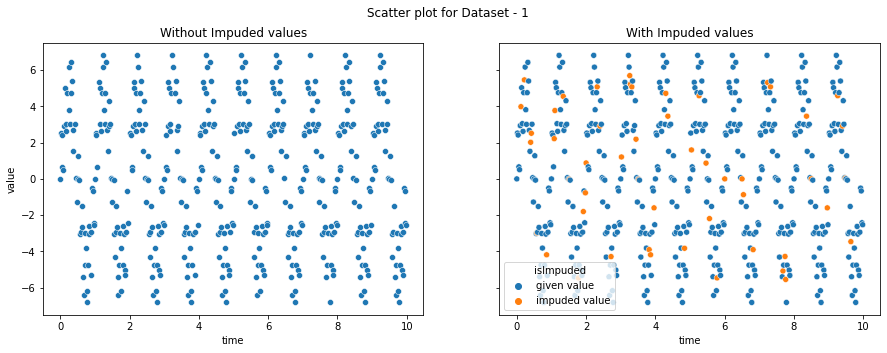

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True) # create 2 subplots
fig.suptitle('Scatter plot for Dataset - 1') # title the scatterplot (super-plot)
sns.scatterplot(ax=axes[0], data=df_1,x="time", y="value" ) # plot without imputed values to the left
axes[0].set_title("Without Impuded values") # title the first plot
sns.scatterplot(ax=axes[1], data=df_1_impuded,x="time", y="value", hue="isImpuded")# plot wit imputed values to the right
_ = axes[1].set_title("With Impuded values") # title the second plot

## Step 2 : Dataset -2

### Step 2a : Load dataset into dataframe

In [8]:
df_2 = pd.read_excel("imputation_homework_29.xlsx", index_col=0) # Read data by selecting index as column-0(1st column)
 # mark all the missing content rows as impuded values as we are gonna impude
df_2["isImpuded"]=df_2.isnull().sum(axis = 1).replace({0: "given value", 1: "impuded value"})
df_2

,x,y,isImpuded
0,1.40,10.00,given value
1,1.45,10.25,given value
2,1.50,10.50,given value
3,1.55,10.75,given value
4,1.60,11.00,given value
...,...,...,...
103,6.55,35.75,given value
104,6.60,36.00,given value
105,6.65,36.25,given value
106,6.70,36.50,given value


### Step 2b: Count missing values in each column.

In [9]:
count_df_2 = df_2.isna().sum().to_frame('count')# Count the number of missing records in each colum
count_df_2.loc["Total missing values in df - 2"]=[count_df_2.sum()[0]]# Sum up the values and add as a new line
count_df_2

,count
x,9
y,0
isImpuded,0
Total missing values in df - 2,9


### Step 2c: Plot Histogram

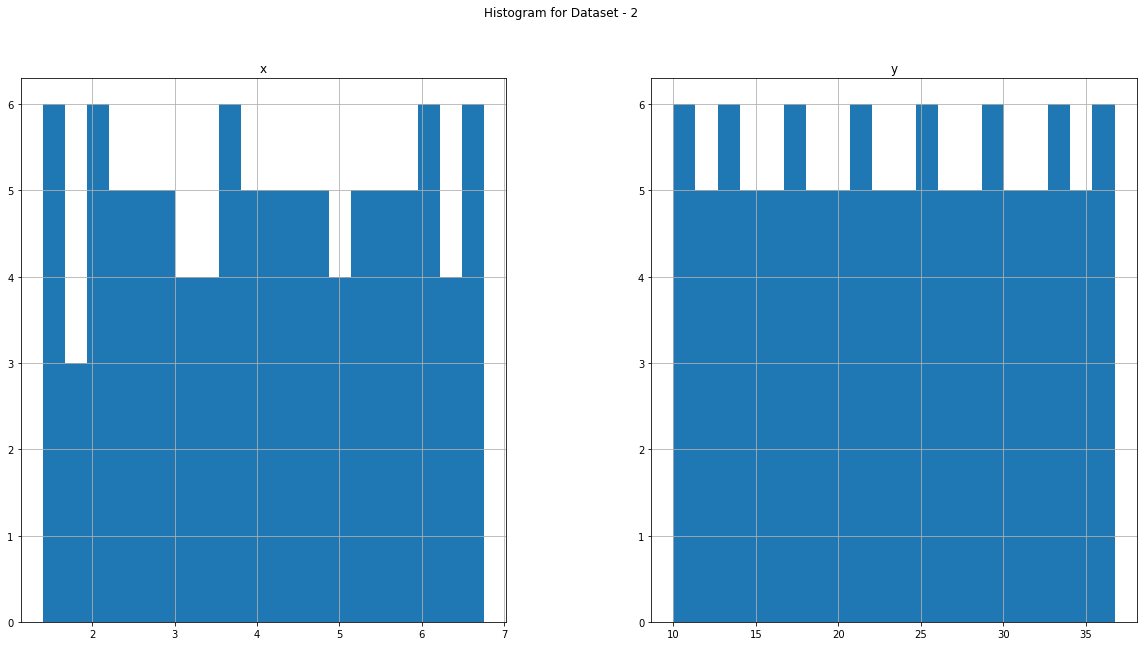

In [10]:
df_2.hist(bins = 20,figsize=(20, 10)) # plot histogram
_ = plt.suptitle("Histogram for Dataset - 2")# Add title

### Step 2d: Create a Log plot

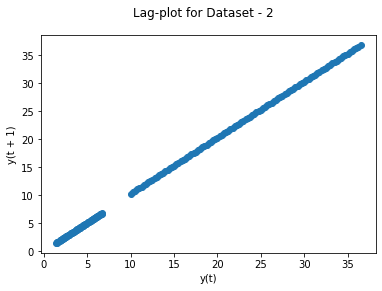

In [11]:
pd.plotting.lag_plot(df_2[["x","y"]], lag=1) # create a t & t+1 lag plot
_ = plt.suptitle("Lag-plot for Dataset - 2") # add title

#### Observation : 

The data is strongly correlated. So the data order is important. We use interpolation to fill the missing values as the order of the data is important in this dataset.

### Step 2e: Interpolate/ Sampling

In [20]:
df_2_impuded =df_2.interpolate()  # interpolate as the data is strongly coorelated

### Step 2f: Create a Scatter plot

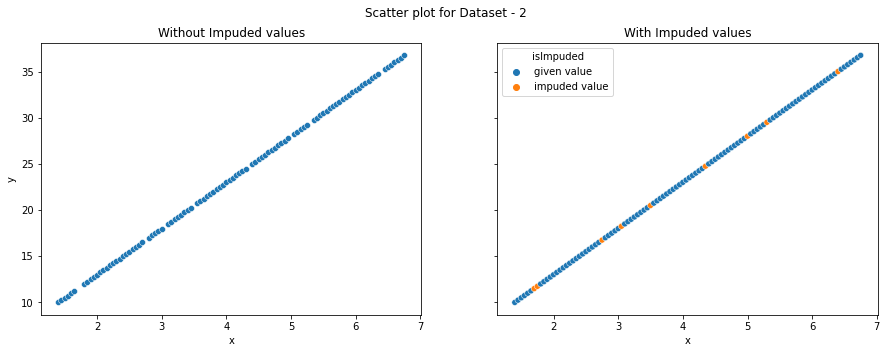

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)# create 2 subplots
fig.suptitle('Scatter plot for Dataset - 2') # title the scatterplot (super-plot)
sns.scatterplot(ax=axes[0], data=df_2[~ df_2.isnull()], x="x", y="y") # plot without imputed values to the left
axes[0].set_title("Without Impuded values")# title the first plot
sns.scatterplot(ax=axes[1], data=df_2_impuded, x="x", y="y", hue="isImpuded")# plot wit imputed values to the right
_ = axes[1].set_title("With Impuded values")# title the second plot

## Step 3 : Dataset -3

### Step 3a : Load dataset into dataframe

In [14]:
df_3 = pd.read_excel("imputation_homework_91.xlsx", index_col=0) # Read data by selecting index as column-0(1st column)
 # mark all the missing content rows as impuded values as we are gonna impude
df_3["isImpuded"]=df_3.isnull().sum(axis = 1).replace({0: "given value", 1: "impuded value"})
df_3



,date,value,isImpuded
0,2015-11-03,30.001248,given value
1,2015-11-04,4.655104,given value
2,2015-11-05,15.621201,given value
3,2015-11-06,22.982759,given value
4,2015-11-07,39.994644,given value
...,...,...,...
847,2018-02-27,NaN,impuded value
848,2018-02-28,14.196152,given value
849,2018-03-01,21.058815,given value
850,2018-03-02,21.038230,given value


### Step 3b: Count missing values in each column.

In [15]:
count_df_3 = df_3.isna().sum().to_frame('count')# Count the number of missing records in each colum
count_df_3.loc["Total missing values in df - 3"]=[count_df_3.sum()[0]]# Sum up the values and add as a new line
count_df_3

,count
date,0
value,84
isImpuded,0
Total missing values in df - 3,84


### Step 3c: Plot Histogram

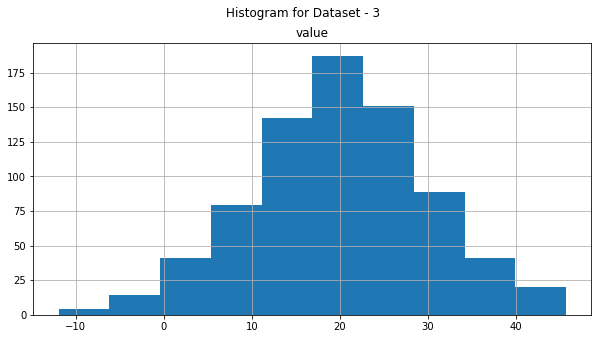

In [16]:
df_3[["value"]].hist(figsize=(10, 5)) # plot histogram
_ = plt.suptitle("Histogram for Dataset - 3")# Add title

### Step 3d: Create a Log plot

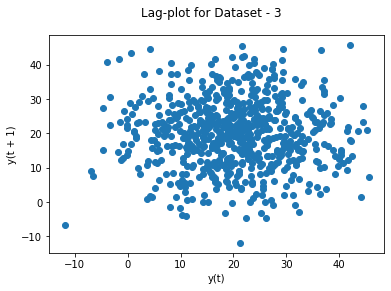

In [17]:
pd.plotting.lag_plot(df_3[["value"]], lag=1)# create a t & t+1 lag plot
_ = plt.suptitle("Lag-plot for Dataset - 3")# add title

#### Observation : 

The data is random. Hence the order of the dataset doen't matter. So we proceed to use sampling to fill the missing values

### Step 3e: Interpolate/ Sampling

In [18]:
"""Sampling is done as the data is random or not coorelated to each other"""
df_3=df_3.apply(lambda x: np.where(x.isnull(), x.dropna().sample(len(x), replace=True), x)) 

### Step 3f: Create a Scatter plot

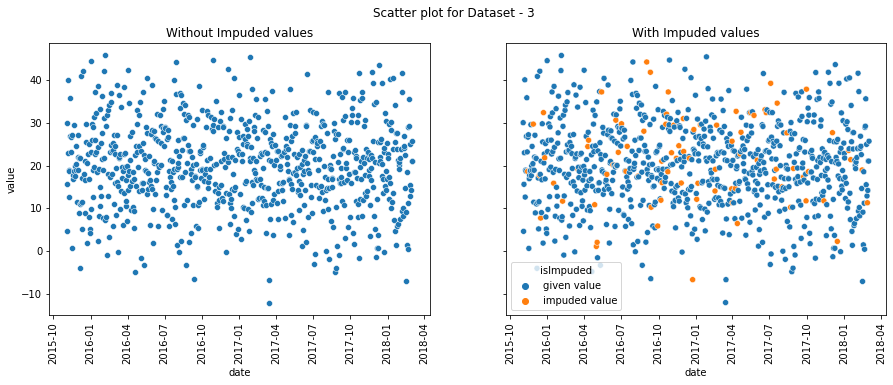

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)# create 2 subplots
fig.suptitle('Scatter plot for Dataset - 3') # title the scatterplot (super-plot)
sns.scatterplot(ax=axes[0], data=df_3[df_3["isImpuded"]=="given value"], x="date", y="value")# plot without imputed values to the left
axes[0].set_title("Without Impuded values")# title the first plot
sns.scatterplot(ax=axes[1], data=df_3, x="date", y="value", hue="isImpuded")# plot wit imputed values to the right
axes[1].set_title("With Impuded values") # title the second plot


# rotate x axis so that we can read dates
for i in [0,1]:
    for tick in axes[i].get_xticklabels():
            tick.set_rotation(90)

References:

- https://stackoverflow.com/questions/46384934/pandas-replace-nan-using-random-sampling-of-column-values 